# Data Explore VN Index

## Import Data VN index


In [184]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
import yfinance as yf

## Get VN index data from 2024-01-01 - 2024-06-01

In [185]:
vni = pd.read_excel('Lich_su_giao_dich.xlsx')
vni.head(7)

,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
0,2024-6-5,1284.35,1284.35,0.83,0.06,810151817,21420.91,112633111,2552.32,1287.12,1293.93,1284.35
1,2024-6-4,1283.52,1283.52,3.52,0.27,785852881,20167.43,127029500,3226.88,1285.51,1289.31,1281.98
2,2024-6-3,1280.00,1280.00,18.28,1.45,930986500,23221.90,107888176,2662.32,1271.65,1284.48,1271.65
3,2024-05-31,1261.72,1261.72,-4.60,-0.36,617744480,15446.56,143847125,3161.41,1268.37,1271.07,1261.43
4,2024-05-30,1266.32,1266.32,-6.32,-0.50,958527286,23730.45,92054663,2122.75,1264.45,1269.07,1251.80
5,2024-05-29,1272.64,1272.64,-9.09,-0.71,967107344,22957.60,105357912,2472.74,1284.74,1285.63,1271.60
6,2024-05-28,1281.73,1281.73,14.05,1.11,744093359,19159.13,120920968,2833.15,1272.23,1281.73,1269.37


## Data Exploration Steps

### Check type


In [186]:
vni.dtypes

Date             object
CloseValue      float64
Adjust          float64
Change          float64
Change_pc       float64
Volumn_trade      int64
Value_trade     float64
Volumn_agr        int64
Value_agr       float64
OpenValue       float64
HighValue       float64
LowValue        float64
dtype: object

In [187]:
vni['Date'] = pd.to_datetime(vni['Date'])

In [188]:
vni.dtypes

Date            datetime64[ns]
CloseValue             float64
Adjust                 float64
Change                 float64
Change_pc              float64
Volumn_trade             int64
Value_trade            float64
Volumn_agr               int64
Value_agr              float64
OpenValue              float64
HighValue              float64
LowValue               float64
dtype: object

### Check null 


In [189]:
null_count = vni.isnull().sum()
print(null_count)

Date            0
CloseValue      0
Adjust          0
Change          0
Change_pc       0
Volumn_trade    0
Value_trade     0
Volumn_agr      0
Value_agr       0
OpenValue       0
HighValue       0
LowValue        0
dtype: int64


### Summary Statistics

In [190]:
vni.describe()

,Date,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue
count,102,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000
mean,2024-03-19 00:42:21.176470528,1228.327255,1228.327255,1.513922,0.130196,8.346949e+08,19661.696176,7.915881e+07,1899.420196,1228.730490,1235.263137,1220.698039
min,2024-01-02 00:00:00,1131.720000,1131.720000,-59.990000,-4.700000,4.891177e+08,11316.690000,0.000000e+00,0.000000,1130.530000,1139.710000,1128.320000
25%,2024-02-06 06:00:00,1183.660000,1183.660000,-4.180000,-0.335000,6.694627e+08,15452.602500,5.122834e+07,1217.652500,1186.335000,1190.930000,1175.045000
50%,2024-03-19 12:00:00,1242.870000,1242.870000,2.125000,0.180000,8.094548e+08,19434.565000,7.601854e+07,1842.215000,1244.645000,1251.125000,1233.525000
75%,2024-04-24 18:00:00,1266.762500,1266.762500,8.675000,0.687500,9.553767e+08,22866.417500,1.088872e+08,2434.742500,1266.387500,1273.640000,1258.372500
max,2024-06-05 00:00:00,1290.180000,1290.180000,28.210000,2.400000,1.616424e+09,40276.110000,2.470587e+08,7008.180000,1293.030000,1293.930000,1285.520000
std,NaN,44.377693,44.377693,11.929034,0.960482,2.084173e+08,5323.849043,4.310840e+07,1101.281878,45.428165,45.296296,43.647563


### Rolling mean and Rolling standard 




In [191]:
#Short term - window size = 7 
vni['Sh_RM'] = vni['CloseValue'].rolling(window=7, center=True).mean()
vni['Sh_RS'] = vni['CloseValue'].rolling(window=7).std()
#Long term - window size = 30 
vni['Lg_RM'] = vni['CloseValue'].rolling(window=30, center=True).mean()
vni['Lg_RS'] = vni['CloseValue'].rolling(window=30).std()


In [209]:
vni.head(5)

,CloseValue,Adjust,Change,Change_pc,Volumn_trade,Value_trade,Volumn_agr,Value_agr,OpenValue,HighValue,LowValue,Sh_RM,Sh_RS,Lg_RM,Lg_RS
Date,,,,,,,,,,,,,,,
2024-06-05,1284.35,1284.35,0.83,0.06,810151817,21420.91,112633111,2552.32,1287.12,1293.93,1284.35,1272.381333,NaN,1246.771667,NaN
2024-06-04,1283.52,1283.52,3.52,0.27,785852881,20167.43,127029500,3226.88,1285.51,1289.31,1281.98,1269.643333,NaN,1243.727000,NaN
2024-06-03,1280.00,1280.00,18.28,1.45,930986500,23221.90,107888176,2662.32,1271.65,1284.48,1271.65,1266.754000,NaN,1241.465667,NaN
2024-05-31,1261.72,1261.72,-4.60,-0.36,617744480,15446.56,143847125,3161.41,1268.37,1271.07,1261.43,1264.400667,NaN,1239.352667,NaN
2024-05-30,1266.32,1266.32,-6.32,-0.50,958527286,23730.45,92054663,2122.75,1264.45,1269.07,1251.80,1263.528667,NaN,1239.848667,NaN


### Line chart


#### 1.Close, High, Low  

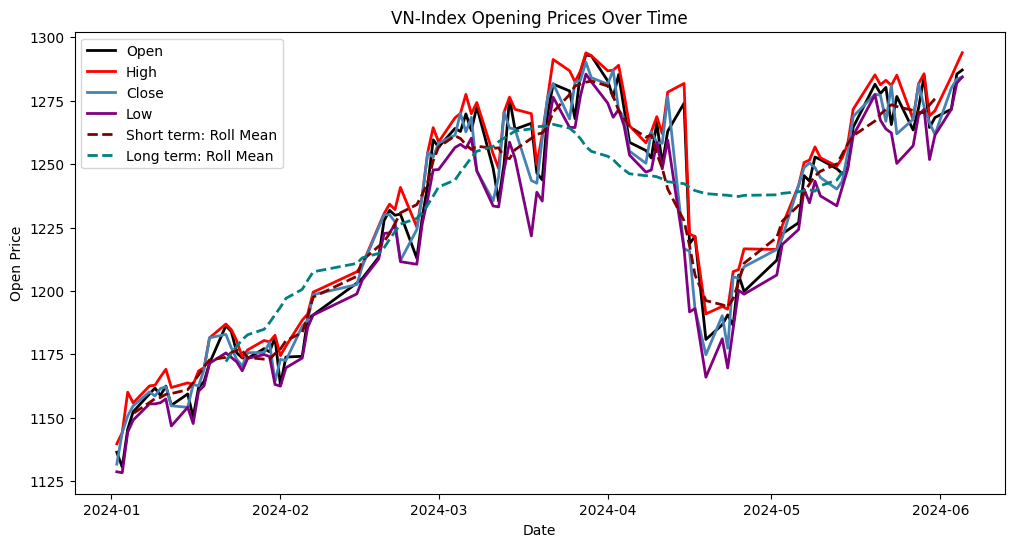

In [193]:
import matplotlib.pyplot as plt

# Plotting the opening prices by date
plt.figure(figsize=(12, 6))
plt.plot(vni['Date'], vni['OpenValue'], color='black', linewidth=2, label='Open')
plt.plot(vni['Date'], vni['HighValue'], color='red', linewidth=2, label='High')
plt.plot(vni['Date'], vni['CloseValue'], color='steelblue', linewidth=2, label='Close')
plt.plot(vni['Date'], vni['LowValue'], color='purple', linewidth=2, label='Low')
plt.plot(vni['Date'], vni['Sh_RM'], color = 'maroon',linestyle = '--', linewidth = 2, label = 'Short term: Roll Mean')
# plt.plot(vni['Date'], vni['Sh_RS'], color = 'darkred',linestyle = '--', linewidth = 2, label = 'Short term: Roll Std')
plt.plot(vni['Date'], vni['Lg_RM'], color = 'teal',linestyle = '--', linewidth = 2, label = 'Long term: Roll Mean')
# plt.plot(vni['Date'], vni['Lg_RM'], color = 'darkcyan',linestyle = '--', linewidth = 2, label = 'Long term: Roll Std')

# Adding title and labels
plt.title('VN-Index Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')

# Adding grid for better visualization
# plt.grid(True)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


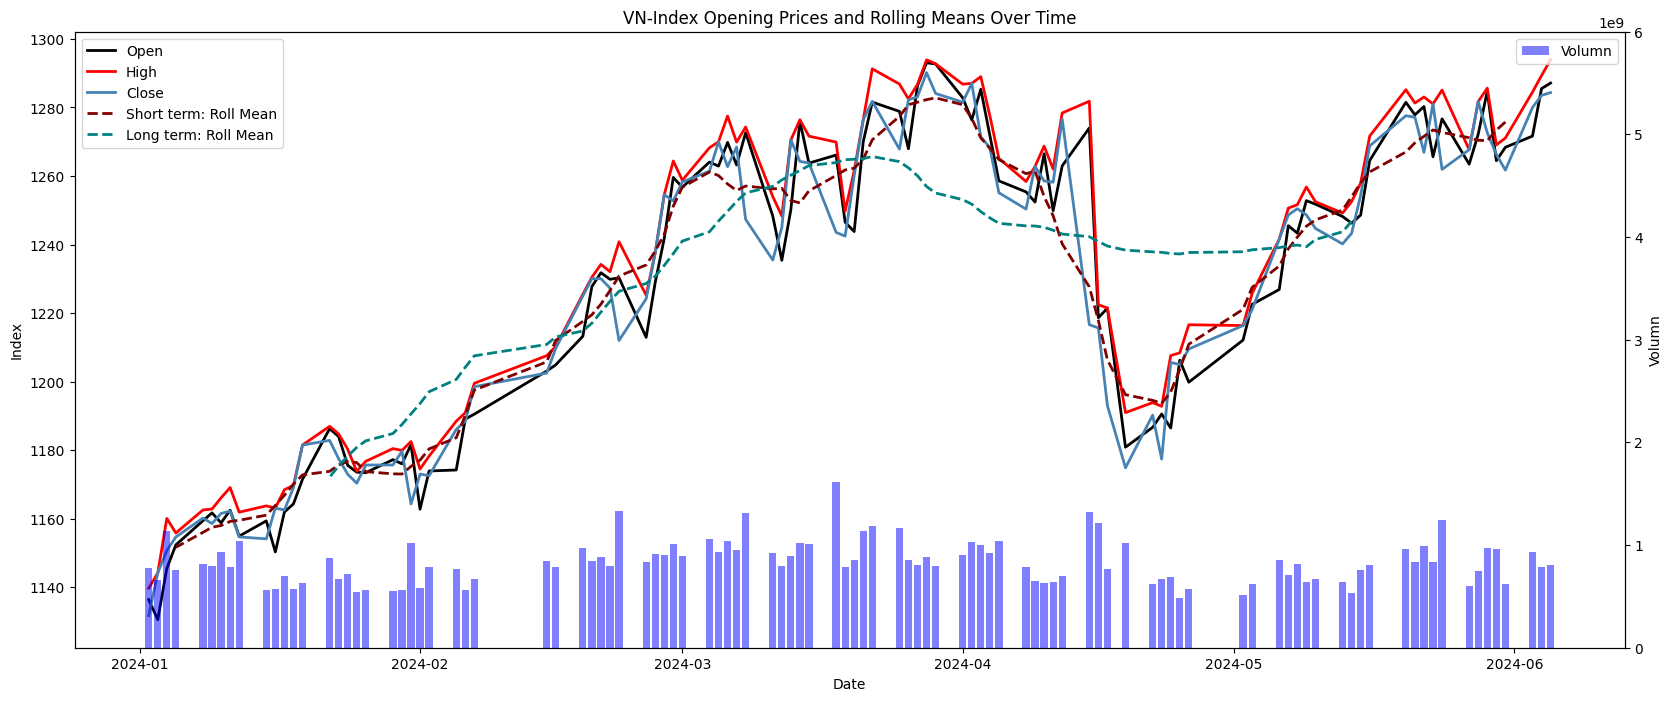

In [194]:
import matplotlib.dates as mdates

# create figure and primary Axes
fig, ax1 = plt.subplots(figsize=(20,8))

#plot the price values on the primary y-axis
ax1.plot(vni['Date'], vni['OpenValue'], color = 'black', linewidth = 2, label = 'Open')
ax1.plot(vni['Date'], vni['HighValue'], color='red', linewidth=2, label='High')
ax1.plot(vni['Date'], vni['CloseValue'], color='steelblue', linewidth=2, label='Close')
## plot the rolling mean 
ax1.plot(vni['Date'], vni['Sh_RM'], color = 'maroon',linestyle = '--', linewidth = 2, label = 'Short term: Roll Mean')
ax1.plot(vni['Date'], vni['Lg_RM'], color = 'teal'  , linestyle = '--', linewidth = 2, label = 'Long term: Roll Mean')
## Adding label and title
ax1.set_title('VN-Index Opening Prices and Rolling Means Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Index')

# Create a secondary y-axis for volumn values
ax2 = ax1.twinx()
ax2.bar(vni['Date'], vni['Volumn_trade'], color='blue', alpha = 0.5, label = 'Volumn')
ax2.set_ylabel('Volumn')
ax2.set_ylim(0,6.0*pow(10,9))
# Adding the legend for both 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



#### Thông tin:
- Trend ngắn hạn: uptrend
- Trend dài hạn: uptrend

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


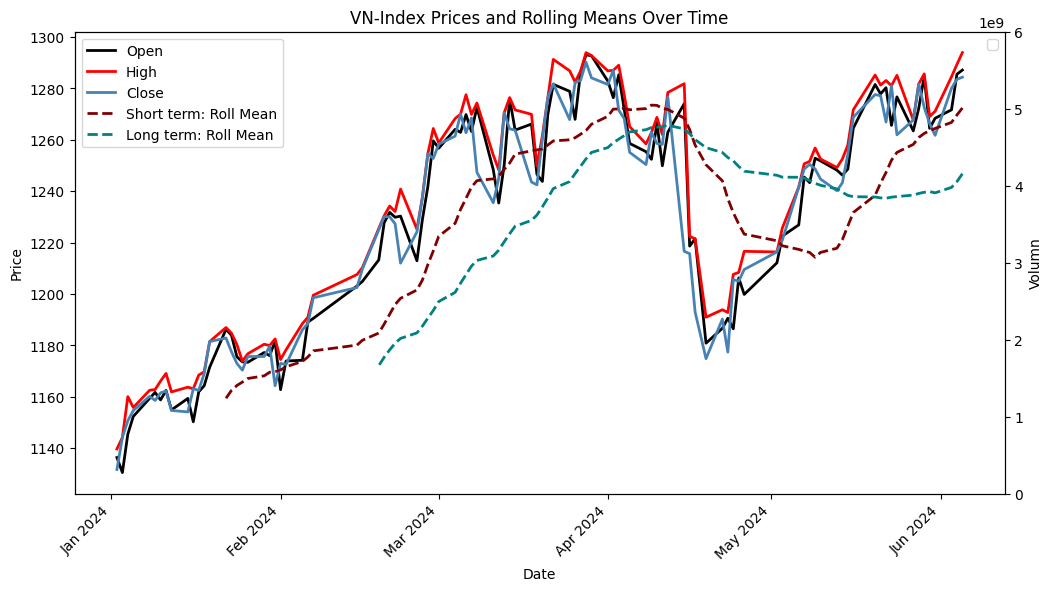

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Reverse the DataFrame
vni_reversed = vni[::-1]

# Calculate rolling means with specified window sizes on the reversed data
short_window = 15  # short-term window size (adjust as needed)
long_window = 30   # long-term window size (adjust as needed)

vni_reversed['Sh_RM'] = vni_reversed['CloseValue'].rolling(window=short_window).mean()
vni_reversed['Lg_RM'] = vni_reversed['CloseValue'].rolling(window=long_window).mean()

# Reverse the DataFrame back to the original order
vni['Sh_RM'] = vni_reversed['Sh_RM'][::-1]
vni['Lg_RM'] = vni_reversed['Lg_RM'][::-1]

# Create figure and primary Axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting price values on the primary y-axis
ax1.plot(vni.index, vni['OpenValue'], color='black', linewidth=2, label='Open')
ax1.plot(vni.index, vni['HighValue'], color='red', linewidth=2, label='High')
ax1.plot(vni.index, vni['CloseValue'], color='steelblue', linewidth=2, label='Close')
ax1.plot(vni.index, vni['Sh_RM'], color='maroon', linestyle='--', linewidth=2, label='Short term: Roll Mean')
ax1.plot(vni.index, vni['Lg_RM'], color='teal', linestyle='--', linewidth=2, label='Long term: Roll Mean')

# Adding title and labels for the primary y-axis
ax1.set_title('VN-Index Prices and Rolling Means Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Setting major locator to month and formatter to month abbreviation and year
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotating date labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Adding legend
ax1.legend()

# Create a secondary y-axis for volumn values

# Displaying the plot
plt.show()


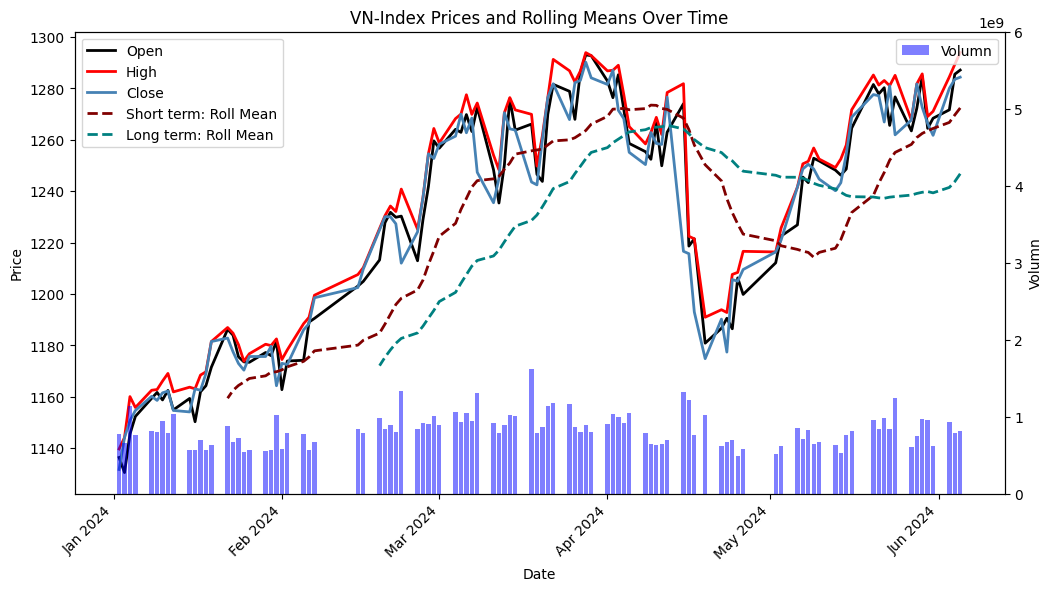

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Reverse the DataFrame
vni_reversed = vni[::-1]

# Calculate rolling means with specified window sizes on the reversed data
short_window = 15  # short-term window size (adjust as needed)
long_window = 30   # long-term window size (adjust as needed)

vni_reversed['Sh_RM'] = vni_reversed['CloseValue'].rolling(window=short_window).mean()
vni_reversed['Lg_RM'] = vni_reversed['CloseValue'].rolling(window=long_window).mean()

# Reverse the DataFrame back to the original order
vni['Sh_RM'] = vni_reversed['Sh_RM'][::-1]
vni['Lg_RM'] = vni_reversed['Lg_RM'][::-1]

# Create figure and primary Axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting price values on the primary y-axis
ax1.plot(vni.index, vni['OpenValue'], color='black', linewidth=2, label='Open')
ax1.plot(vni.index, vni['HighValue'], color='red', linewidth=2, label='High')
ax1.plot(vni.index, vni['CloseValue'], color='steelblue', linewidth=2, label='Close')
ax1.plot(vni.index, vni['Sh_RM'], color='maroon', linestyle='--', linewidth=2, label='Short term: Roll Mean')
ax1.plot(vni.index, vni['Lg_RM'], color='teal', linestyle='--', linewidth=2, label='Long term: Roll Mean')

# Adding title and labels for the primary y-axis
ax1.set_title('VN-Index Prices and Rolling Means Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Setting major locator to month and formatter to month abbreviation and year
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotating date labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# # Create secondary y-axis for volume
# ax2 = ax1.twinx()
# ax2.bar(vni.index, vni['Volumn_trade'], color='blue', alpha=0.3, label='Volume', width=2)

# # Adding labels and setting limits for the secondary y-axis
# ax2.set_ylabel('Volume')
# ax2.set_ylim(0, vni['Volumn_trade'].max() * 1.1)  # Adjust the upper limit as needed

# Create a secondary y-axis for volumn values
ax2 = ax1.twinx()
ax2.bar(vni.index, vni['Volumn_trade'], color='blue', alpha = 0.5, label = 'Volumn')
ax2.set_ylabel('Volumn')
ax2.set_ylim(0,6.0*pow(10,9))

# Adding legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Displaying the plot
plt.show()


#### 2. Rolling Standard 

[None, None, None, None, None, None, None, None, None, None, None, None]

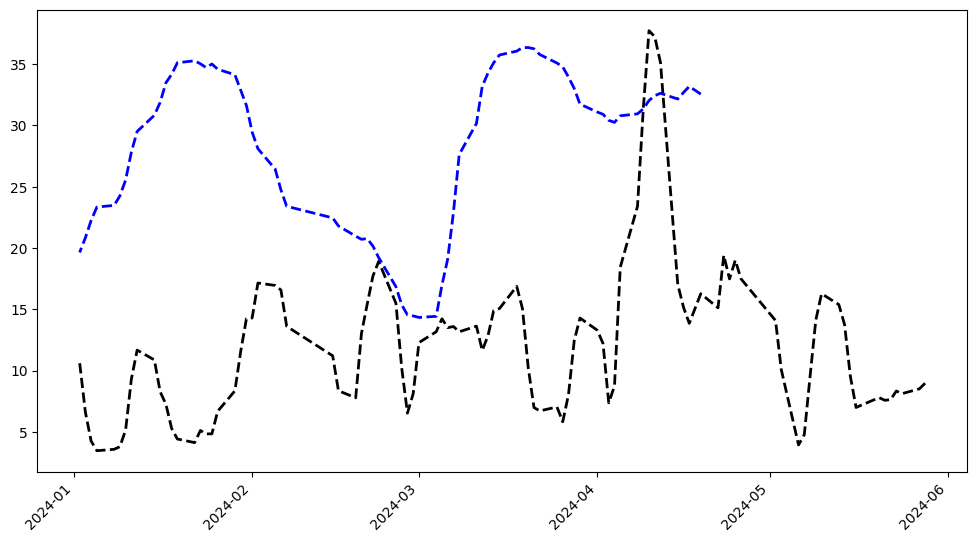

In [211]:
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.plot(vni.index, vni['Sh_RS'], color = 'black',linestyle = '--', linewidth = 2, label = 'Short term Rolling standard')
ax1.plot(vni.index, vni['Lg_RS'], color = 'blue', linestyle = '--', linewidth = 2, label = 'Long term Rolling standard')
# Rotating date labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

#### Thông tin:
- Có sự thay đổi mạnh về phương sai -> sử dụng họ các mô hình ARCH 


### Box plot 

### Mô hình base line 


#### ARIMA

ADF Statistic: -0.673846
p-value: 0.853408
Critial Values:
   1%, -3.5003788874873405
Critial Values:
   5%, -2.8921519665075235
Critial Values:
   10%, -2.5830997960069446
ADF Statistic: -4.158980
p-value: 0.000773
Critial Values:
   1%, -3.5003788874873405
Critial Values:
   5%, -2.8921519665075235
Critial Values:
   10%, -2.5830997960069446


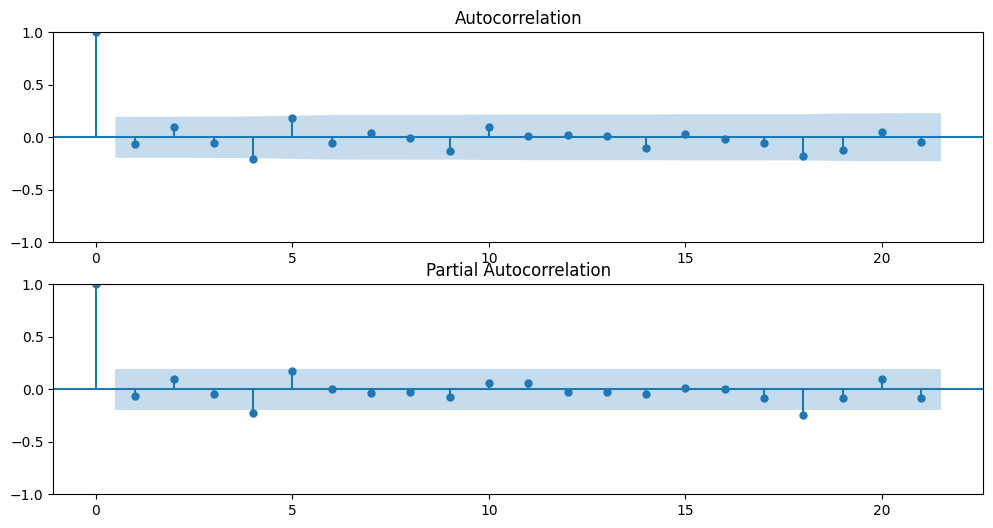

                               SARIMAX Results                                
Dep. Variable:             CloseValue   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -61.730
Date:                Mon, 10 Jun 2024   AIC                            129.459
Time:                        01:06:11   BIC                            132.446
Sample:                             0   HQIC                           130.042
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1754      0.651     -0.270      0.787      -1.451       1.100
ma.L1          0.7014      0.410      1.710      0.087      -0.102       1.505
sigma2        27.4485     12.370      2.219      0.0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

ValueError: Length mismatch: Expected axis has 81 elements, new values have 21 elements

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

# Check stationarity of the 'Close' column
check_stationarity(vni['CloseValue'])

# Difference the data to make it stationary if needed
vni['Close_diff'] = vni['CloseValue'].diff().dropna()

# Check stationarity of the differenced series
check_stationarity(vni['Close_diff'].dropna())

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(vni['Close_diff'].dropna(), ax=plt.gca())
plt.subplot(212)
plot_pacf(vni['Close_diff'].dropna(), ax=plt.gca())
plt.show()

# Split the data into training and testing sets
train_size = int(len(vni) * 0.8)
train, test = vni['CloseValue'][train_size:], vni['CloseValue'][:train_size]

# Fit ARIMA model on the training data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
predictions = model_fit.forecast(steps=len(test))
test.index = vni.index[train_size:train_size+len(test)]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model - VN-Index Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
